In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the excel data using pandas
df=pd.read_excel('social_data.xlsx')

In [3]:
#displaying the data 
df

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video
...,...,...,...,...,...,...,...
3474,2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0,0,Link
3475,2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0,0,Link
3476,2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0,0,Link
3477,2023-01-03 10:34:03.438,CSGO,TWITTER,N/A,2116,42,Text


In [4]:
# renaming the column names for ease of use 
df.rename(columns = {'Published Date':'Published_Date', 'Account Type':'Account_Type',
                     'Campaign Name':'Campaign_Name','Total Impressions':'Total_Impressions',
                    'Total Engagements':'Total_Engagements','Media Type':'Media_Type'}, inplace = True)

In [5]:
df.columns

Index(['Published_Date', 'Account', 'Account_Type', 'Campaign_Name',
       'Total_Impressions', 'Total_Engagements', 'Media_Type'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Published_Date     3479 non-null   datetime64[ns]
 1   Account            3479 non-null   object        
 2   Account_Type       3479 non-null   object        
 3   Campaign_Name      3479 non-null   object        
 4   Total_Impressions  3479 non-null   int64         
 5   Total_Engagements  3479 non-null   int64         
 6   Media_Type         3479 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 190.4+ KB


In [7]:
df.describe()

,Total_Impressions,Total_Engagements
count,3479.000000,3479.000000
mean,10972.453579,947.390629
std,29577.108063,3468.628038
min,0.000000,0.000000
25%,167.000000,0.000000
50%,1884.000000,39.000000
75%,12467.000000,276.500000
max,753227.000000,95062.000000


In [8]:
#checking if there are any missing values 
df.isnull().sum()
#There  are no NAN values in the data 

Published_Date       0
Account              0
Account_Type         0
Campaign_Name        0
Total_Impressions    0
Total_Engagements    0
Media_Type           0
dtype: int64

In [9]:
# to know the frequency count of the Account Type
df.Account_Type.value_counts()

TWITTER             1951
INSTAGRAM            588
FBPAGE               585
YOUTUBE              220
TIKTOK_BUSINESS      113
LINKEDIN_COMPANY      22
Name: Account_Type, dtype: int64

In [10]:
# to display the index of the account types
AccountType_names=df.Account_Type.value_counts().index
AccountType_names

Index(['TWITTER', 'INSTAGRAM', 'FBPAGE', 'YOUTUBE', 'TIKTOK_BUSINESS',
       'LINKEDIN_COMPANY'],
      dtype='object')

In [11]:
df_Account_type=df.Account_Type.value_counts().values
df_Account_type

array([1951,  588,  585,  220,  113,   22])

([<matplotlib.patches.Wedge at 0x7f8c0a42a130>,
 [Text(-0.2088118289660595, 1.0799988981864053, 'TWITTER'),
  Text(-0.6725561313203842, -0.8704414111376816, 'INSTAGRAM'),
  Text(0.42976871339525613, -1.0125704187791515, 'FBPAGE'),
  Text(0.9940628403072947, -0.4709979506539218, 'YOUTUBE'),
  Text(1.0889636593023095, -0.15542891854131788, 'TIKTOK_BUSINESS'),
  Text(1.099782938350537, -0.021851510544101005, 'LINKEDIN_COMPANY')],
 [Text(-0.11389736125421425, 0.5890903081016755, '56.08%'),
  Text(-0.36684879890202765, -0.4747862242569172, '16.90%'),
  Text(0.23441929821559424, -0.5523111375159008, '16.82%'),
  Text(0.5422160947130698, -0.25690797308395735, '6.32%'),
  Text(0.5939801778012597, -0.0847794101134461, '3.25%'),
  Text(0.5998816027366565, -0.011919005751327821, '0.63%')])

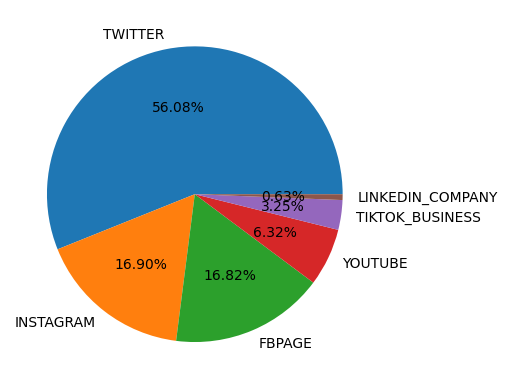

In [12]:
# to display it in piechart with percenatage 
plt.pie(df_Account_type[:],labels=AccountType_names[:],autopct='%1.2f%%')

#1. What is the typical engagement rate we can expect? What’s the likelihood that we can achieve a 15% engagement rate?

In [13]:
# Inorder to answer this question we should first calculate the typical enagament rate 
# (Total_engagements / Total_Impressions) *100 gives us the total engagement  rate
df['Engagement_Rate'] = (df['Total_Engagements'] / df['Total_Impressions']) * 100
# need to calculate avg to get the typical engagement rate 
average_engagement_rate = df['Engagement_Rate'].mean()
print(f"Average Engagement Rate: {average_engagement_rate:.2f}%")

Average Engagement Rate: 40.49%


In [14]:
# Inorder to address the second part of the question which is what is the likelihood that we can achieve a 15% engagement rate 
# we need to know the Z value .
desired_engagement_rate = 15
difference = desired_engagement_rate - average_engagement_rate
print(f"Difference: {difference:.2f}%")

Difference: -25.49%


In [15]:
# we are calculating the standard deviation
engagement_rates_std = df['Engagement_Rate'].std()
engagement_rates_std

1797.5531279668996

In [16]:
# Now difference / engagement_rates_std gives us the Z value 
Z= difference/engagement_rates_std
Z

-0.014181846068735602

In [17]:
# Now we got the Z value as -0.0141 we can check in the table to get the probabilty or we can use scipy.stats library inorder to get the probabilty as shown below
from scipy.stats import norm

z_score = -0.0141818

# Calculate the probability associated with the given Z-score
probability = norm.cdf(z_score)

print(f"Probability: {probability:.4f}")

Probability: 0.4943


# The typical enagagement rate that we can expect is 40.49%  We have 49.43 Probability or likelihood  to achieve a 15 percent or above engagement rate 

#2. Does day of the week and time of posting affect engagement rates?

In [18]:
# Converting the 'Published Date' column to datetime format
df['Published_Date'] = pd.to_datetime(df['Published_Date'])
df['Day of Week'] = df['Published_Date'].dt.dayofweek
df['Hour of Day'] = df['Published_Date'].dt.hour

In [19]:
df['Day of Week'].unique()

array([4, 3, 2, 1, 0, 6, 5])

In [20]:
# Calculating the average engagement rate for each day of the week
avg_engagement_by_day = df.groupby('Day of Week')['Engagement_Rate'].mean()
# Calculating the average engagement rate for each hour of the day
avg_engagement_by_hour = df.groupby('Hour of Day')['Engagement_Rate'].mean()

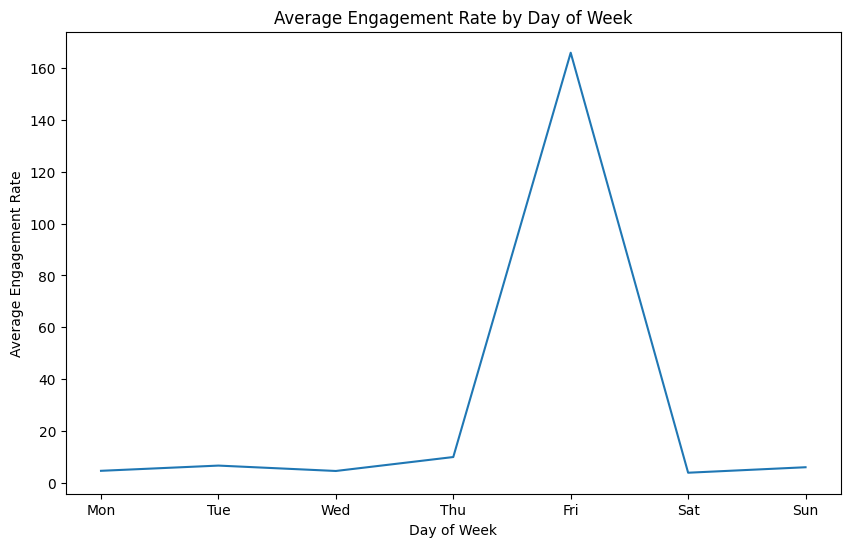

In [21]:
# Plot the average engagement rates by day of the week
plt.figure(figsize=(10, 6))
plt.plot(avg_engagement_by_day.index, avg_engagement_by_day.values)
plt.xlabel('Day of Week')
plt.ylabel('Average Engagement Rate')
plt.title('Average Engagement Rate by Day of Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# From the graph above we can say that friday has the high avg engagement rate compared to anyother day of the week 

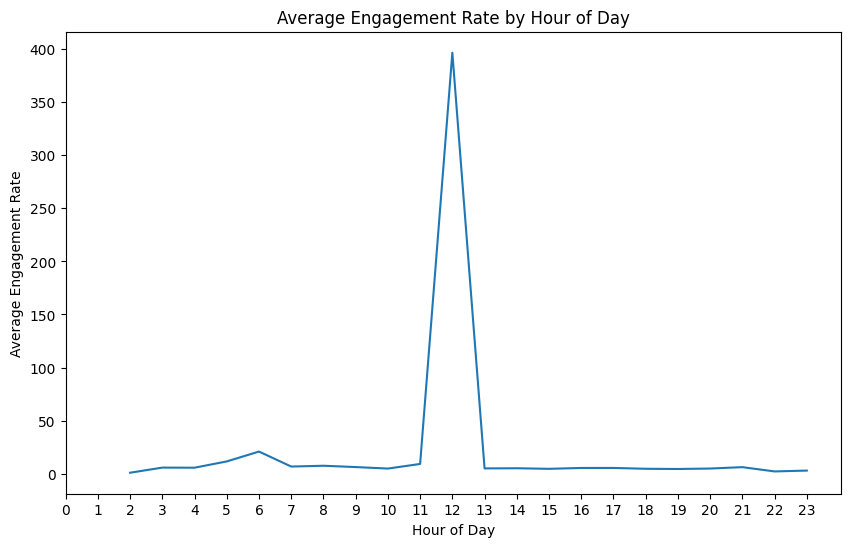

In [22]:
# Plot the average engagement rates by hour of the day
plt.figure(figsize=(10, 6))
plt.plot(avg_engagement_by_hour.index, avg_engagement_by_hour.values)
plt.xlabel('Hour of Day')
plt.ylabel('Average Engagement Rate')
plt.title('Average Engagement Rate by Hour of Day')
plt.xticks(range(24))
plt.show()

# From the graph above we can say that 12th hour of the day has the high avg engagement rate compared to any hour of the day

#3.How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?

In [23]:
df['Account'].unique()

array(['CSGO', 'General ', 'DOTA2', 'Content Creators', 'Valorant',
       'General'], dtype=object)

In [24]:
# Grouping the data by game titles (Account column) and calculate the average social performance metrics
game_performance = df.groupby('Account').mean()
game_performance

,Total_Impressions,Total_Engagements,Engagement_Rate,Day of Week,Hour of Day
Account,,,,,
CSGO,8570.066667,341.985185,4.132564,2.637037,13.103704
Content Creators,852.566038,26.169811,6.171672,2.603774,12.924528
DOTA2,2315.474471,154.408468,4.944886,3.148194,12.300125
General,1945.500000,38.590909,1.795018,2.363636,11.545455
General,14922.481726,1354.680317,60.663931,3.044474,12.425363
Valorant,382.983333,15.516667,5.337990,2.800000,11.516667


In [25]:
# Sorting the games based on social performance metrics (e.g., engagement rate, impressions)
sorted_games = game_performance.sort_values(by='Engagement_Rate', ascending=False)
# Printing the sorted games and their respective social performance metrics
print(sorted_games[['Engagement_Rate', 'Total_Impressions']])

                  Engagement_Rate  Total_Impressions
Account                                             
General                 60.663931       14922.481726
Content Creators         6.171672         852.566038
Valorant                 5.337990         382.983333
DOTA2                    4.944886        2315.474471
CSGO                     4.132564        8570.066667
General                  1.795018        1945.500000


# We see that mostly General has high engagement_rate and high total_impresssions . Inorder to get more engagement rate we can assign names to the General 

#4.What media type performs the best?

In [26]:
# Grouping the data by media type (Media Type column) and calculating the average social performance metrics
media_performance = df.groupby('Media_Type').mean()
media_performance

,Total_Impressions,Total_Engagements,Engagement_Rate,Day of Week,Hour of Day
Media_Type,,,,,
Album,5.000000,2.000000,40.000000,3.000000,6.000000
Carousel,17854.333333,726.777778,3.784294,2.777778,11.555556
Link,2473.031915,24.010638,3.749983,2.648936,11.861702
Mixed,36996.800000,2732.800000,10.770357,3.200000,12.800000
Photo,16036.236242,1454.858389,83.121288,3.287248,12.551007
Text,3413.409890,270.672527,4.083904,2.878022,12.489011
Video,10956.373320,888.780765,5.351780,2.784902,12.295760


In [27]:
 #Sort the media types based on social performance metrics (e.g., engagement rate, impressions)
sorted_media = media_performance.sort_values(by='Engagement_Rate', ascending=False)
sorted_media 

,Total_Impressions,Total_Engagements,Engagement_Rate,Day of Week,Hour of Day
Media_Type,,,,,
Photo,16036.236242,1454.858389,83.121288,3.287248,12.551007
Album,5.000000,2.000000,40.000000,3.000000,6.000000
Mixed,36996.800000,2732.800000,10.770357,3.200000,12.800000
Video,10956.373320,888.780765,5.351780,2.784902,12.295760
Text,3413.409890,270.672527,4.083904,2.878022,12.489011
Carousel,17854.333333,726.777778,3.784294,2.777778,11.555556
Link,2473.031915,24.010638,3.749983,2.648936,11.861702


In [28]:
# Printing the best performing media type
print("Best Performing Media Type:", sorted_media.index[0])
print(sorted_media.index.tolist())

Best Performing Media Type: Photo
['Photo', 'Album', 'Mixed', 'Video', 'Text', 'Carousel', 'Link']


In [29]:
media_names = sorted_media.index.tolist()
engagement_rates = sorted_media['Engagement_Rate']

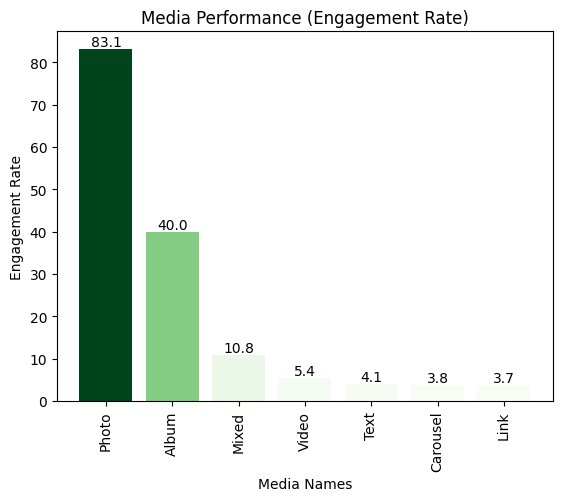

In [30]:
import matplotlib.cm as cm
# Normalize the engagement rates between 0 and 1
norm = plt.Normalize(min(engagement_rates), max(engagement_rates))
colors = cm.Greens(norm(engagement_rates))

# Round the engagement rates to one decimal place
rounded_rates = np.round(engagement_rates, decimals=1)

plt.bar(media_names, engagement_rates,color=colors)
# Customize the plot
plt.xticks(rotation='vertical')
plt.xlabel('Media Names')
plt.ylabel('Engagement Rate')
plt.title('Media Performance (Engagement Rate)')

# Add labels to the bars
for i, rate in enumerate(rounded_rates):
    plt.text(i, rate, str(rate), ha='center', va='bottom')
    
plt.show()

# We see that the The Media Type - Photo has high engagement rate followed by album and mixed . 

#5. what is best performining campaign

In [31]:
# Group the data by campaign name (Campaign Name column and calculate the average social performance metrics
campaign_performance = df.groupby('Campaign_Name').mean()
campaign_performance

,Total_Impressions,Total_Engagements,Engagement_Rate,Day of Week,Hour of Day
Campaign_Name,,,,,
Community Engagement,16870.131821,1449.161588,5.765298,3.065202,12.725018
Evergreen,8151.711656,264.582822,3.510548,2.466258,11.466258
Evil Exhibited,13672.845238,441.202381,2.866060,3.035714,11.473810
N/A,4914.536027,688.736027,126.066603,3.037037,12.538721


In [32]:
# Sort the campaigns based on social performance metrics (e.g., engagement rate, impressions)
sorted_campaigns = campaign_performance.sort_values(by='Engagement_Rate', ascending=False)
sorted_campaigns 

,Total_Impressions,Total_Engagements,Engagement_Rate,Day of Week,Hour of Day
Campaign_Name,,,,,
N/A,4914.536027,688.736027,126.066603,3.037037,12.538721
Community Engagement,16870.131821,1449.161588,5.765298,3.065202,12.725018
Evergreen,8151.711656,264.582822,3.510548,2.466258,11.466258
Evil Exhibited,13672.845238,441.202381,2.866060,3.035714,11.473810


In [33]:
# The best performing campaign is the one with the highest engagement rate 
# Printing the best performing campaign
print("Best Performing Campaign:",sorted_campaigns.index[0])
print(sorted_campaigns.index.tolist())

Best Performing Campaign: N/A 
['N/A ', 'Community Engagement ', 'Evergreen ', 'Evil Exhibited ']


In [34]:
campaign_names = sorted_campaigns.index.tolist()
engagement_rates = sorted_campaigns['Engagement_Rate']

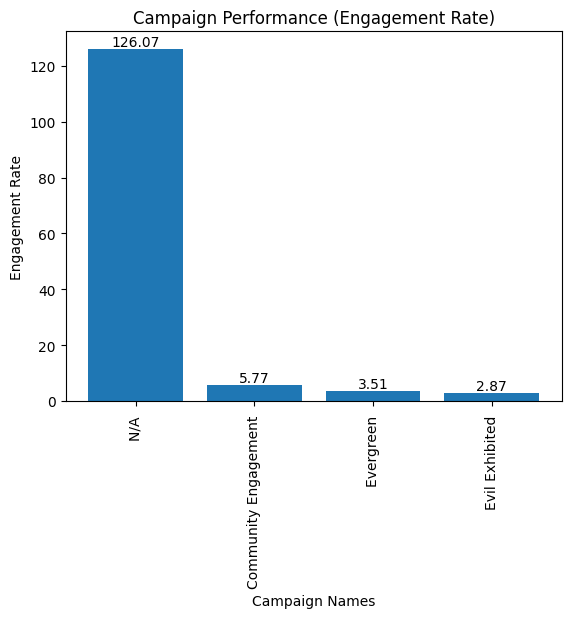

In [35]:
# Round the engagement rates to one decimal place
rounded_rates = np.round(engagement_rates, decimals=2)

plt.bar(campaign_names, engagement_rates)
# Customize the plot
plt.xticks(rotation='vertical')
plt.xlabel('Campaign Names')
plt.ylabel('Engagement Rate')
plt.title('Campaign Performance (Engagement Rate)')

# Add labels to the bars
for i, rate in enumerate(rounded_rates):
    plt.text(i, rate, str(rate), ha='center', va='bottom')
    
plt.show()

#6. Define out a posting strategy for our social channels based on your discoveries.

1.  Allocating  more resources and effort towards Twitter as the value_count is more  and then  to instagram 
2. Scheduling the  posts on Twitter and instagram to be published around the 12th hour of the day, which has shown higher engagement.
3. Give special attention to posting on Fridays, as this day has shown particularly high engagement. Plan and create content that is specifically tailored for Fridays to take advantage of the increased audience interest.
4. Focusing on the type of content like images that performed well on the social media's as well as the campaign names and creating similar content that resonates with your audience
5. Maintain a consistent posting schedule on Twitter and instagram  including regular posts on Fridays during the high-engagement period. Consistency helps build an engaged audience and increases the chances of your content being seen and shared.
6. Continuously monitoring and analyzing the performance of our posts on Twitter, particularly during the 12th hour of the day and on Fridays. Tracking the engagement metrics, such as likes, retweets, comments, and click-through rates, to assess the effectiveness of our strategy and making adjustments if necessary.


#7. What suggestions would you give to the social media team if they want to expand their presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?

1. Expanding your social media presence can be a great strategy to reach a wider audience
2. Having the demographics and preferences of the current audience for the youtude CSGO  we can analyze and determine the audience  on tiktok aligns with the target demographics then there is a potential to reach a new audience on tiktok is worth considering expansion 
2. Developing a content strategy tailored to each platform. Adapting our CSGO content to fit the strengths and limitations of TikTok, focusing on short, visually appealing videos that align with TikTok trends and formats. Considering the unique features of TikTok, such as challenges, duets, and effects, to create engaging and shareable content.
3. Making behind the scenes videos and uploading them on tiktok
4. Keeping  track of the performance metrics and engagement levels on both platforms. Analyzing the response and engagement from the audience on TikTok compared to YouTube. This data will help us to  assess the effectiveness of our expansion efforts and make informed decisions for future strategies.
5. Actively engaging with the community on tiktok. Responding to comments, participating in trends, collaborating with other creators, and leverage relevant hashtags. Building a presence and establishing connections with the TikTok community will help grow our following and increase brand awareness.